In [2]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy import io

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server
Traceback (most recent call last):
  File "/usr/local/spark-current/python/lib/py4j-0.8.2.1-src.zip/py4j/java_gateway.py", line 425, in start
    self.socket.connect((self.address, self.port))
  File "/usr/local/python-2.7.6/lib/python2.7/socket.py", line 224, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 111] Connection refused
/usr/local/python-2.7.6/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Last 5 full loss iterations
[ 301.89956914  299.14125836  301.56514499  300.33039957  300.00374188]


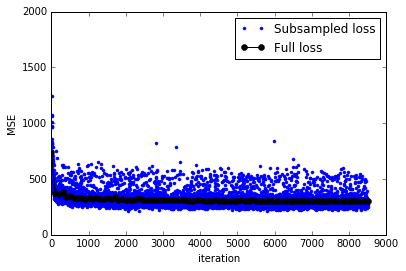

In [3]:
expt=io.loadmat('output.mat')
loss=expt['loss']
loss = loss[loss>0]
lossall = loss[::100]
tall = np.arange(len(lossall))*100

print 'Last 5 full loss iterations'
print lossall[-5:]

plt.plot(loss,'.');
plt.plot(tall,lossall,'ko-');
plt.legend(('Subsampled loss','Full loss'));
plt.ylim(0,2000);
plt.xlabel('iteration');
plt.ylabel('MSE');

Last 5 full loss iterations
[ 506.10884889  506.09614633  506.18867316  506.17738775  506.09548205]


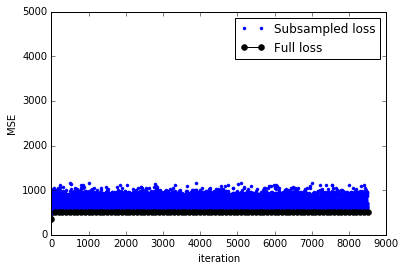

In [4]:
loss_gt=expt['loss_gt']
loss_gt = loss_gt[loss_gt>0]
lossall = loss_gt[::100]
tall = np.arange(len(lossall))*100

print 'Last 5 full loss iterations'
print lossall[-5:]

plt.plot(loss_gt,'.');
plt.plot(tall,lossall,'ko-');
plt.legend(('Subsampled loss','Full loss'));
plt.ylim(0,5000);
plt.xlabel('iteration');
plt.ylabel('MSE');

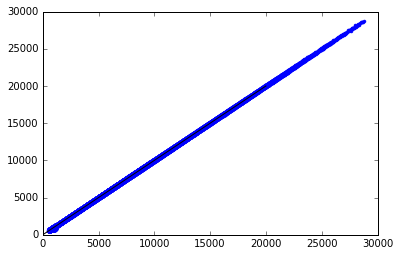

In [6]:
plt.plot(expt['Y'].ravel(),expt['Xhat'].ravel(),'.');
plt.plot([0, 20000],[0, 20000],'k');

(1, 1048576)
445.753864194
Color limits: (0, 89.59842224852558)


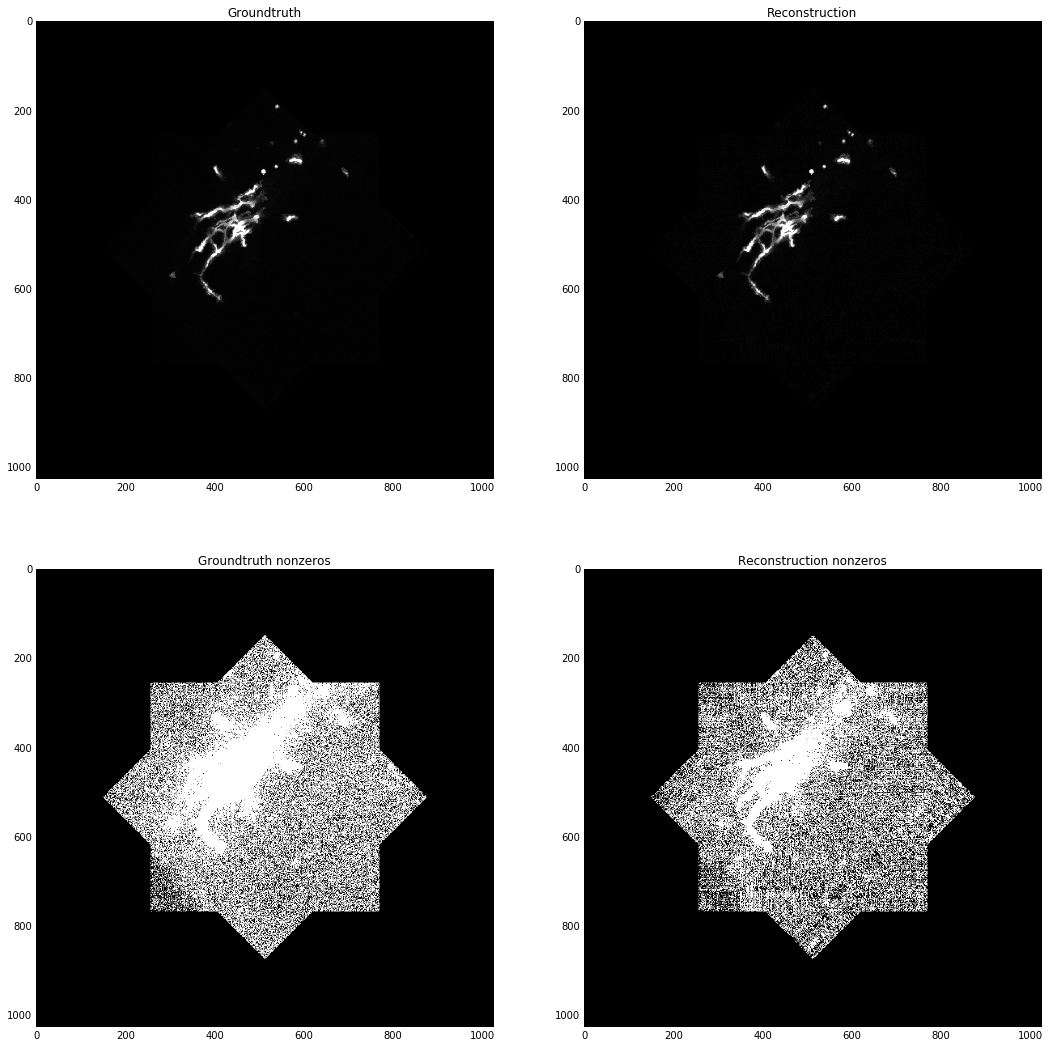

In [5]:
IM = expt['IM'] #REFERENCE IMAGE

recon_gt = expt['recon_gt'];
print recon_gt.shape
recon_gt = np.reshape(recon_gt, IM.shape)

recon = expt['recon'];
print np.max(recon)
recon = np.reshape(recon, IM.shape)

Cmin = 0
Cmax = np.max(recon_gt)*.2
print 'Color limits:', (Cmin, Cmax)

f,ax = plt.subplots(2,2,figsize=(18.,18.));
# ax[0].imshow(recon,cmap=plt.cm.get_cmap('gray'))  #,  vmin=Cmin, vmax=Cmax)
ax[0,0].imshow(recon_gt, vmin=Cmin, vmax=Cmax, cmap=plt.cm.get_cmap('gray'));
ax[0,0].set_title('Groundtruth');
ax[0,1].imshow(recon, vmin=Cmin, vmax=Cmax, cmap=plt.cm.get_cmap('gray'));
ax[0,1].set_title('Reconstruction');
ax[1,0].imshow(recon_gt>1, cmap=plt.cm.get_cmap('gray'));
ax[1,0].set_title('Groundtruth nonzeros');
ax[1,1].imshow(recon>1, cmap=plt.cm.get_cmap('gray'));
ax[1,1].set_title('Reconstruction nonzeros');

Color limits: (0, 421.854043753599)


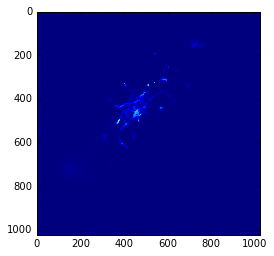